## 0. 스크래치(Scratch) 영역 검사

In [1]:
import torch
import cv2
import matplotlib.pyplot as plt

from src.Models import Unet

### 0-1 Model 로드
models폴더의 `[DAMAGE][Scratch_0]Unet.pt` 불러오기
- Unet 사용이유
- encoder는 'resnet34'기반의 모델사용. pre_weight는 imagnet을 사용.

In [2]:
weight_path = 'models/[DAMAGE][Scratch_0]Unet.pt'

n_classes = 2
device = 'cuda' if torch.cuda.is_available() else 'cpu'


model = Unet(encoder='resnet34', pre_weight='imagenet', num_classes=n_classes).to(device)
model.model.load_state_dict(torch.load(weight_path, map_location=torch.device(device)))
model.eval() 


print('[Scratch] Loaded pretrained model!')


[Scratch] Loaded pretrained model!


### 0-2 이미지 로드

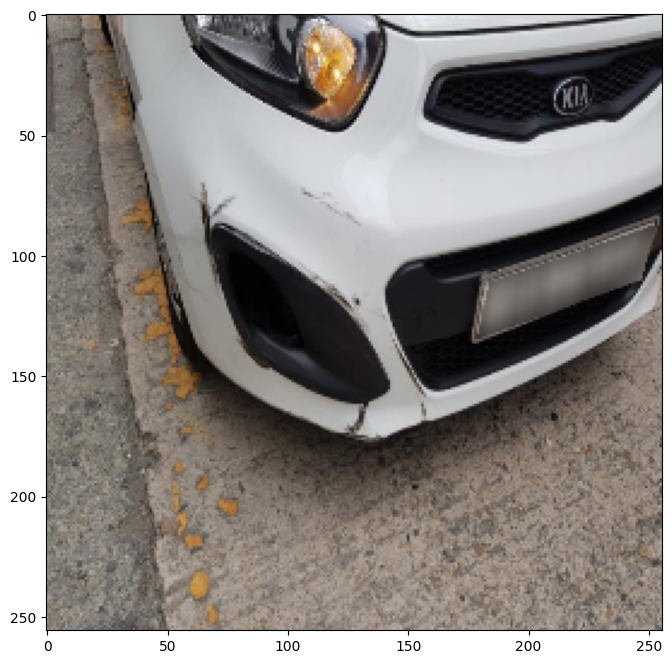

In [3]:
img_path = 'samples/damage/0000094_sc-126705.jpg'

img  = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #RGB 컬러 시스템의 이미지
img = cv2.resize(img, (256, 256)) #이미지 사이즈

plt.figure(figsize=(8, 8))
plt.imshow(img)

### 0-3 이미지 전처리

In [4]:
img_input = img / 255. # 0~1의 값으로 변경해 Normalization
img_input = img_input.transpose([2, 0, 1])
img_input = torch.tensor(img_input).float().to(device)
img_input = img_input.unsqueeze(0)

img_input.shape

torch.Size([1, 3, 256, 256])

### 0-4 모델 추론

In [5]:
output = model(img_input)

output.shape

torch.Size([1, 2, 256, 256])

### 0-5 후처리 및 추론 마스크 시각화

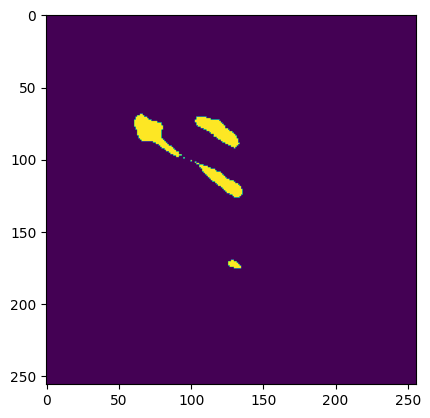

In [6]:
img_output = torch.argmax(output, dim=1).detach().cpu().numpy()
img_output = img_output.transpose([1, 2, 0])

plt.imshow(img_output)

### 0-6 결과
jet colormap을 사용해 0~1 사이 값으로 RGB를 표현
파란색(0), 빨간색(1)

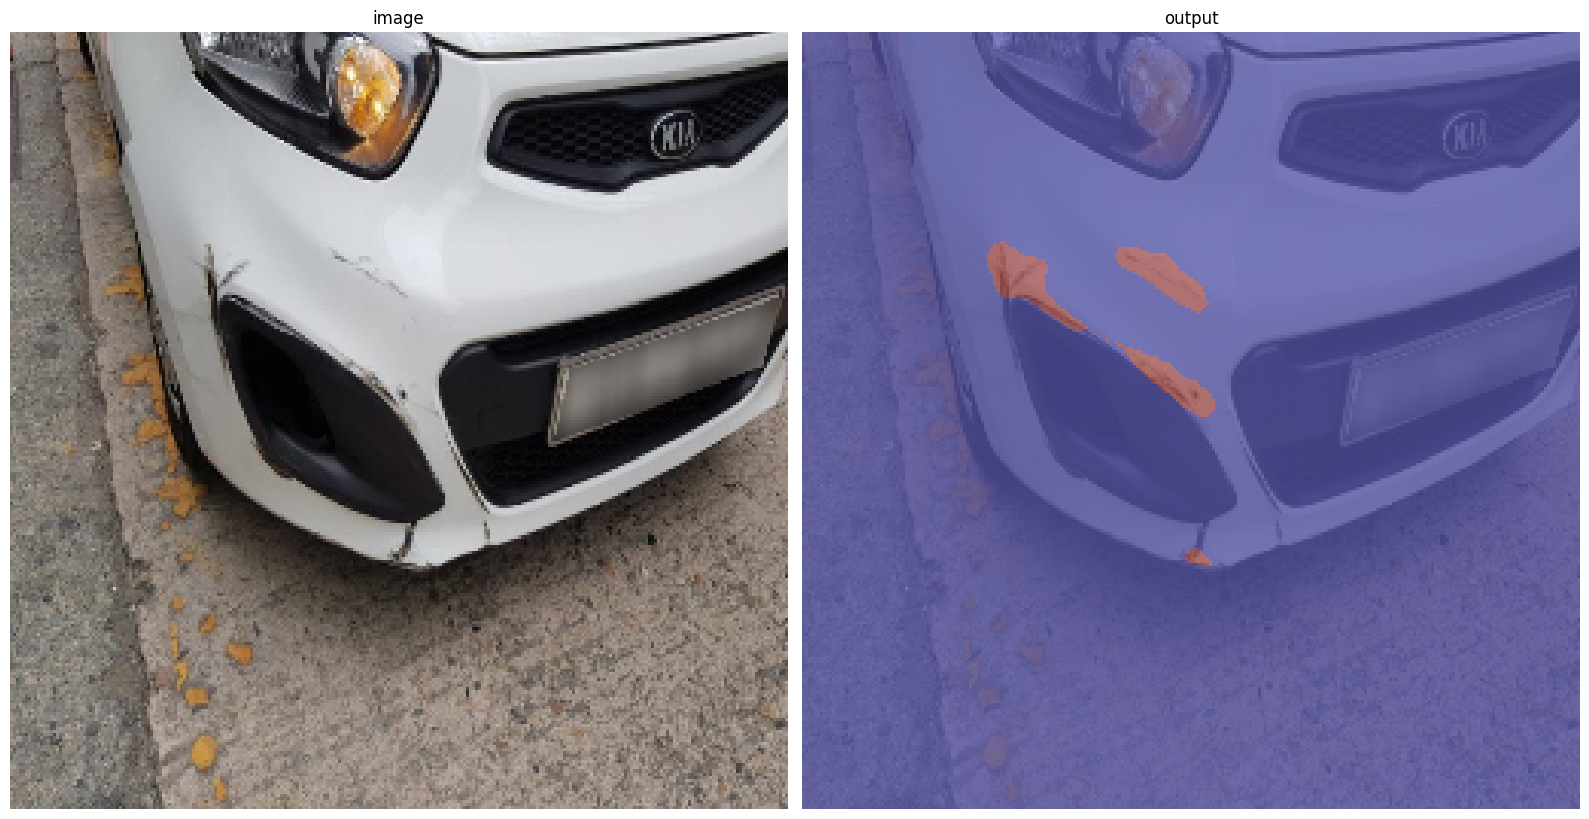

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))

ax[0].imshow(img)
ax[0].set_title('image')
ax[0].axis('off')

ax[1].imshow(img.astype('uint8'), alpha=0.5)
ax[1].imshow(img_output, cmap='jet', alpha=0.5)
ax[1].set_title('output')
ax[1].axis('off')

fig.set_tight_layout(True)
plt.show()